## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK 11 : Algoritma Densitas dan Asosiasi </div>

#### <div align="center"> Semester Genap 2022/2023 </div>

In [1]:
# Run this code when you restart the machine
# Fill in with YOUR name and NIM
import datetime
import uuid

myName = "Nisa'ul Fadhilah"
myNIM = "00000060236"

In [2]:
myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Nisa'ul Fadhilah
NIM: 		00000060236
Start: 		2023-11-16 13:58:46.006133
Device ID: 	9610469a-844d-11ee-81db-2c3b70a37f3c



---

### Dataset yang dipakai:

1. seattle-weather.csv – sumber : https://www.kaggle.com/datasets/ananthr1/weather-prediction
2. basket_analysis.csv – sumber : https://www.kaggle.com/datasets/ahmtcnbs/datasets-for-appiori

---

### Penjelasan Dataset

Dataset seattle-weather.csv adalah tentang prediksi cuaca dengan menggunakan beberapa kondisi cuaca sebagai fitur untuk memprediksi apakah akan terjadi hujan atau tidak. Dataset ini memiliki beberapa kolom yang menjadi fitur-fitur utama dalam prediksi cuaca, antara lain:

precipitation: Informasi tentang jumlah presipitasi yang terjadi.
temp_max: Suhu maksimum dalam rentang waktu tertentu.
temp_min: Suhu minimum dalam rentang waktu tertentu.
wind: Kecepatan atau arah angin pada saat tertentu.
Prediksi yang akan dilakukan dalam dataset ini adalah kondisi cuaca, yang termasuk:

drizzle: Hujan gerimis ringan.
rain: Hujan.
sun: Cuaca cerah atau berawan.
snow: Cuaca salju.
fog: Kabut.

Dataset Market Basket Analysis yang menggunakan algoritma Apriori adalah sebuah kumpulan data yang digunakan untuk menemukan kumpulan item yang sering muncul dalam sebuah dataset transaksi untuk tujuan pencarian aturan asosiasi boolean. Algoritma Apriori diperkenalkan oleh R. Agrawal dan R. Srikant pada tahun 1994 untuk menemukan itemset yang sering muncul dalam data transaksi dengan asosiasi aturan tertentu.

### Hasil kerja

#### Importing system library

In [1]:

import sys

#### Importing numpy library

In [6]:
!pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/38/d2/3e8c13ffc37ca5ebc6f382b242b44acb43eb489042e1728407ac3904e72f/opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB 495.5 kB/s eta 0:01:17
   ---------------------------------------- 0.1/38.1 MB 880.9 kB/s eta 0:00:44
   ---------------------------------------- 0.2/38.1 MB 1.2 MB/s eta 0:00:33
   ---------------------------------------- 0.2/38.1 MB 1.4 MB/s eta 0:00:28
   ---------------------------------------- 0.3/38.1 MB 1.5 MB/s eta 0:00:26
   ---------------------------------------- 0.3/38.1 MB 1.2 MB/s eta 0:00:31
   ---------------------------------------- 0.4/38.1 MB 1.3 MB/s eta 0:00:29
   ---------------------------------------- 0.4/38.1 MB 1.3 MB/s eta 0:00:29
    ---------------

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import DBSCAN

In [3]:
def cluster_gen(n_clusters, pts_minmax=(10, 100), x_mult=(1, 4), y_mult=(1, 3),
               x_off=(0, 50), y_off=(0, 50)):
    
    clusters_x = []
    clusters_y = []
    
    n_points = np.random.randint(pts_minmax[0], pts_minmax[1], n_clusters)
    x_multipliers = np.random.randint(x_mult[0], x_mult[1], n_clusters)
    y_multipliers = np.random.randint(y_mult[0], y_mult[1], n_clusters)
    x_offsets = np.random.randint(x_off[0], x_off[1], n_clusters)
    y_offsets = np.random.randint(y_off[0], y_off[1], n_clusters)
    
    for idx, npts in enumerate(n_points):
        xpts = np.random.randn(npts) * x_multipliers[idx] + x_offsets[idx]
        ypts = np.random.randn(npts) * y_multipliers[idx] + y_offsets[idx]
        clusters_x.append(xpts)
        clusters_y.append(ypts)
        
    return clusters_x, clusters_y

In [4]:
n_clusters = 50
clusters_x, clusters_y = cluster_gen(n_clusters)

In [5]:
data = np.float32((np.concatenate(clusters_x), np.concatenate(clusters_y))).transpose()

In [6]:
max_distance = 1
db = DBSCAN(eps=max_distance, min_samples=10).fit(data)

In [7]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True


In [8]:
labels = db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
unique_labels = set(labels)

<Axes: >

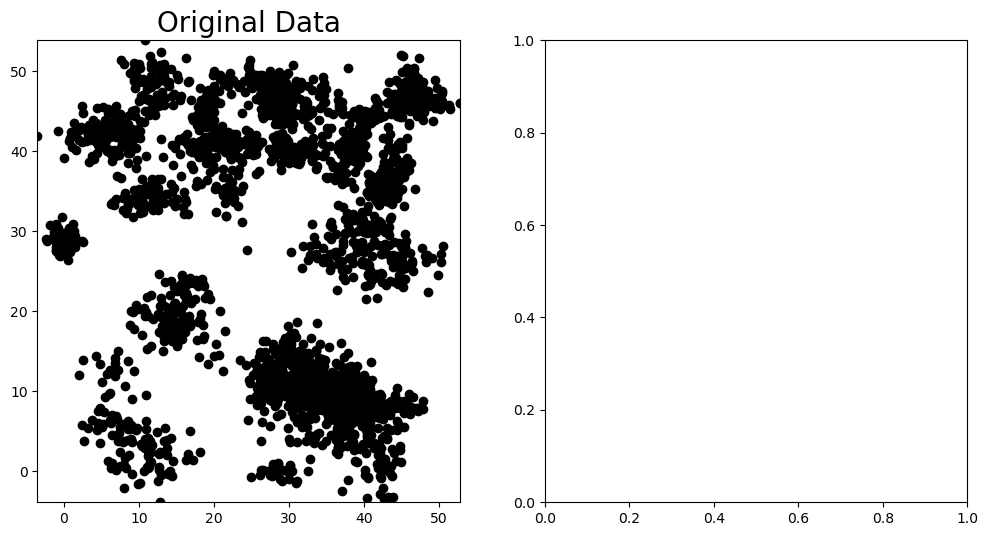

In [9]:
min_x = np.min(data[:, 0])
max_x = np.max(data[:, 0])
min_y = np.min(data[:, 1])
max_y = np.max(data[:, 1])

fig = plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(data[:, 0], data[:, 1], 'ko')
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)
plt.title('Original Data', fontsize = 20)

plt.subplot(122)

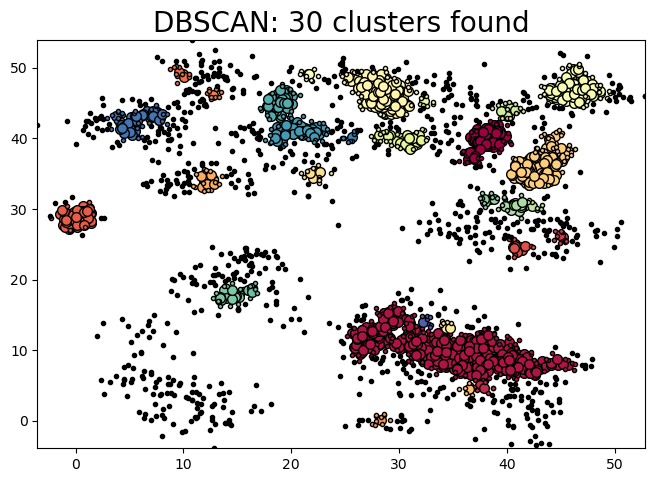

In [10]:
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
        
    class_member_mask = (labels == k)
    
    xy = data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
           markeredgecolor='k', markersize=7)
    
    xy = data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
           markeredgecolor='k', markersize=3)
    
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)
plt.title('DBSCAN: %d clusters found' % n_clusters, fontsize = 20)
fig.tight_layout()
plt.subplots_adjust(left=0.03, right=0.98, top=0.9, bottom=0.05)

In [11]:
import numpy as np
import pandas as pd

import os

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [12]:
df = pd.read_csv("seattle-weather.csv")
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [13]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [14]:
df.dtypes

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

<Axes: xlabel='weather', ylabel='wind'>

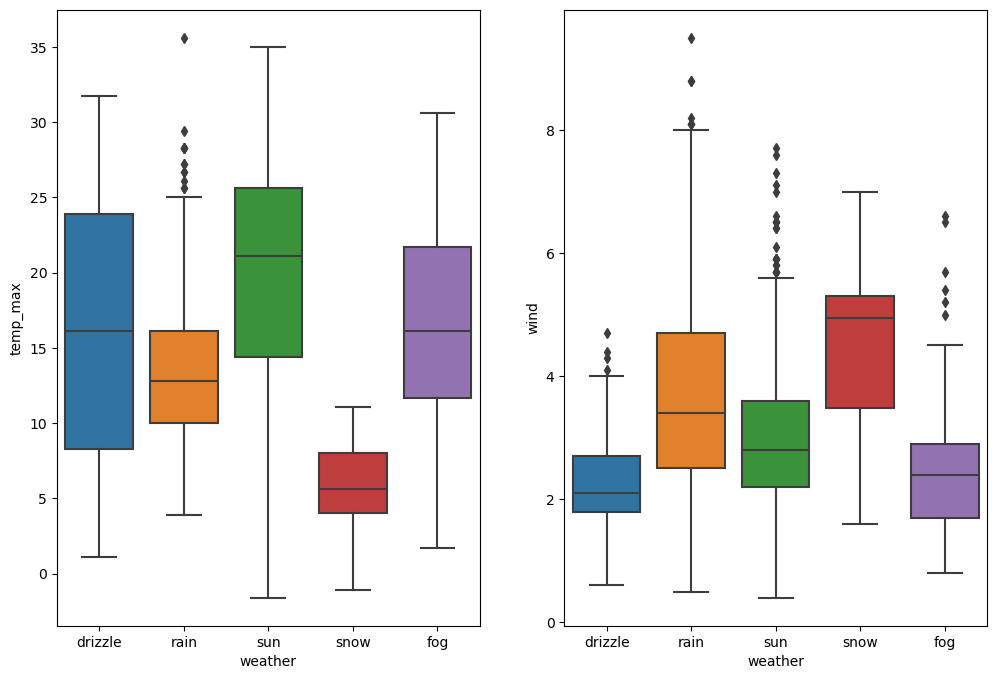

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

sns.boxplot(x = "weather", y="temp_max", data=df, orient='v', ax=axes[0])
sns.boxplot(x = "weather", y="wind", data=df, orient='v', ax=axes[1])


In [16]:
df_group_one = df[['weather', 'temp_max', 'wind']]
df_group_one.groupby(['weather'], as_index=False).mean()

,weather,temp_max,wind
0,drizzle,15.926415,2.367925
1,fog,16.757426,2.481188
2,rain,13.454602,3.669891
3,snow,5.573077,4.411538
4,sun,19.861875,2.956406


In [17]:
df_rain = df[df['weather'] == "rain"]
print(df_rain.shape)
df_rain.head()

(641, 6)


,date,precipitation,temp_max,temp_min,wind,weather
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain


In [18]:
Percentage = (df_rain.shape[0]/df.shape[0]) * 100
print('Rain Percentage: ', round(Percentage), '%')

Rain Percentage:  44 %


In [19]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

Clus_dataset = df_rain[['precipitation', 'temp_max', 'wind']]
Clus_dataset = np.nan_to_num(Clus_dataset)
Clus_dataset = np.array(Clus_dataset, dtype=np.float64)
Clus_dataset = StandardScaler().fit_transform(Clus_dataset)

db = DBSCAN(eps=0.5, min_samples=4).fit(Clus_dataset)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df_rain['Clus_Db'] = labels

realClusterNum = len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

print(df_rain[['precipitation', 'temp_max', 'wind', 'Clus_Db']].head())
print("Number of Labels: ", set(labels))

   precipitation  temp_max  wind  Clus_Db
1           10.9      10.6   4.5        0
2            0.8      11.7   2.3        0
3           20.3      12.2   4.7        0
4            1.3       8.9   6.1        0
5            2.5       4.4   2.2        0
Number of Labels:  {0, 1, 2, -1}


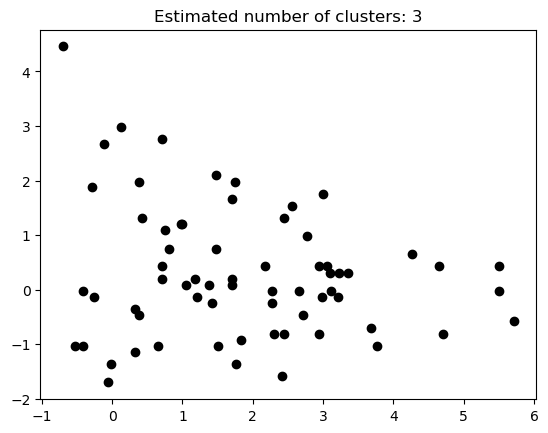

Number of noise(s):  66


In [20]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
         for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
        
        class_member_mask = (labels == k)
        
        xy = Clus_dataset[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                markeredgecolor='k', markersize=14)
        
        xy = Clus_dataset[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                markeredgecolor='k', markersize=6)
        
plt.title('Estimated number of clusters: %d' % realClusterNum)
plt.show()

n_noise_ = list(labels).count(-1)
print('Number of noise(s): ', n_noise_)

In [21]:
for clust_number in set(labels):
    clust_set = df_rain[df_rain.Clus_Db == clust_number]
    if clust_number != -1:
        print("Cluster " + str(clust_number) + ', Avg Precipitation: ' + str(round(np.mean(clust_set.precipitation)))+\
             ', Avg Temp Max: ' + str(round(np.mean(clust_set['temp_max'])))+\
             ', Avg Wind: '+ str(round(np.mean(clust_set['wind'])))+\
             ', Count: '+ str(np.count_nonzero(clust_set.index)))

Cluster 0, Avg Precipitation: 4, Avg Temp Max: 13, Avg Wind: 4, Count: 567
Cluster 1, Avg Precipitation: 27, Avg Temp Max: 11, Avg Wind: 4, Count: 4
Cluster 2, Avg Precipitation: 20, Avg Temp Max: 19, Avg Wind: 3, Count: 4


In [22]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [83]:
dataset = pd.read_csv("basket_analysis.csv")
dataset.head()

,Unnamed: 0,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [84]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,,0,:,A,B,C,D,E,I,K,...,l,m,n,o,p,r,s,t,u,y
0,True,True,True,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [85]:
dataset = dataset.drop(['Unnamed: 0'], axis=1)
dataset.head()

,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [86]:
from mlxtend.frequent_patterns import apriori

apriori(dataset, min_support=0.2)

,support,itemsets
0,0.383383,(0)
1,0.384384,(1)
2,0.420420,(2)
3,0.404404,(3)
4,0.407407,(4)
5,0.398398,(5)
6,0.384384,(6)
7,0.410410,(7)
8,0.408408,(8)
9,0.405405,(9)


In [90]:
apriori(dataset, min_support=0.1,use_colnames=True)

,support,itemsets
0,0.383383,(Apple)
1,0.384384,(Bread)
2,0.420420,(Butter)
3,0.404404,(Cheese)
4,0.407407,(Corn)
...,...,...
164,0.101101,"(chocolate, Nutmeg, Ice cream)"
165,0.101101,"(Ice cream, chocolate, Onion)"
166,0.100100,"(Milk, Nutmeg, Kidney Beans)"
167,0.101101,"(Yogurt, Nutmeg, Kidney Beans)"


In [92]:
frequent_itemsets =  apriori(dataset, min_support=0.2, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.383383,(Apple),1
1,0.384384,(Bread),1
2,0.420420,(Butter),1
3,0.404404,(Cheese),1
4,0.407407,(Corn),1
5,0.398398,(Dill),1
6,0.384384,(Eggs),1
7,0.410410,(Ice cream),1
8,0.408408,(Kidney Beans),1
9,0.405405,(Milk),1


In [95]:
frequent_itemsets[(frequent_itemsets['length'] == 1) & (frequent_itemsets['support'] >= 0.3)]

,support,itemsets,length
0,0.383383,(Apple),1
1,0.384384,(Bread),1
2,0.420420,(Butter),1
3,0.404404,(Cheese),1
4,0.407407,(Corn),1
5,0.398398,(Dill),1
6,0.384384,(Eggs),1
7,0.410410,(Ice cream),1
8,0.408408,(Kidney Beans),1
9,0.405405,(Milk),1


In [96]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'Cheese'} ]

,support,itemsets,length
3,0.404404,(Cheese),1


In [97]:
from mlxtend.frequent_patterns import fpgrowth
fpgrowth(dataset, min_support=0.3)

,support,itemsets
0,0.421421,(15)
1,0.420420,(14)
2,0.410410,(7)
3,0.409409,(12)
4,0.407407,(4)
5,0.398398,(5)
6,0.384384,(1)
7,0.405405,(9)
8,0.420420,(2)
9,0.383383,(0)


In [98]:
fpgrowth(dataset, min_support=0.4, use_colnames=True)

,support,itemsets
0,0.421421,(chocolate)
1,0.420420,(Yogurt)
2,0.410410,(Ice cream)
3,0.409409,(Sugar)
4,0.407407,(Corn)
5,0.405405,(Milk)
6,0.420420,(Butter)
7,0.404404,(Cheese)
8,0.403403,(Onion)
9,0.401401,(Nutmeg)


In [71]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)

df = pd.DataFrame(te_ary, columns=te.columns_)

In [99]:
from mlxtend.frequent_patterns import apriori

%timeit -n 100 -r 10 apriori(dataset, min_support=0.6)

1.23 ms ± 107 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [100]:
from mlxtend.frequent_patterns import fpgrowth

%timeit -n 100 -r 10 fpgrowth(dataset, min_support=0.6)

4.48 ms ± 1.52 ms per loop (mean ± std. dev. of 10 runs, 100 loops each)


---

### Kesimpulan



Berikan simpulan yang dilakukan dari hasil kerja menggunakan algoritma dan 2 dataset yang
dipilih. Simpulan bisa berkisar antara (bisa di modifikasi):

    - Pada dataset pertama yaitu seattle-weather.csv Boxplot "Snow" pada data "Wind" memiliki nilai minimum mendekati 2 atau sekitar 1.8 dan memiliki nilai maksimum sekitar 7. Boxplot tersebut memiliki nilai kuartil Q1 sekitar 3.5, Q2 sekitar 5, dan Q3 sekitar 5.5.
    
    - Dalam perhitungan kejadian yang memiliki probabilitas kejadian = 1, hujan memiliki probabilitasn 0.4 atau 40% dari keseluruhan cuaca
    
    - hasil klasterisasi menunjukkan bahwa ada empat klaster yang teridentifikasi dalam data cuaca, dengan label -1 menunjukkan data yang dianggap sebagai noise atau data yang tidak cocok dengan klaster manapun. Semua data dalam lima baris pertama dari dataset telah diberi label klaster 0 oleh algoritma DBSCAN.
    
    - Berdasarkan dataset kedua yaitu basket_analysis.csv mengeluarkan Output yang berisi dua kolom utama: support dan itemsets. Mari saya jelaskan:
    + support: Kolom ini menunjukkan nilai support dari masing-masing itemset yang ditemukan dalam dataset. Support adalah seberapa sering itemset tertentu muncul dalam dataset. Nilai support ini menunjukkan seberapa umum atau seringnya suatu itemset muncul dalam transaksi. Misalnya, support 0.383383 pada itemset (0) berarti item tunggal dengan label 0 muncul sebanyak 38.38% dari seluruh transaksi.
    + itemsets: Kolom ini menampilkan itemset yang teridentifikasi. Itemset merupakan himpunan item atau kombinasi item yang memiliki support di atas ambang batas yang telah ditentukan. Misalnya, (2, 7) menunjukkan gabungan dua item, yaitu item dengan label 2 dan 7, yang memiliki support sebesar 20.72% dari keseluruhan transaksi.
    
    + Beberapa contoh itemset yang ditunjukkan dalam output:
    (2) memiliki support sekitar 42.04%, menunjukkan bahwa item dengan label 2 muncul secara signifikan dalam transaksi.
    (9, 15) memiliki support sekitar 21.12%, menunjukkan bahwa gabungan item dengan label 9 dan 15 juga muncul cukup sering dalam transaksi.

---

In [3]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 		Nisa'ul Fadhilah
NIM: 		00000060236
Time-stamp:	2023-11-16 11:32:42.405959


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [1]:
!jupyter nbconvert --to html "./IF540L_Kelas_EL_laporan_M11_00000060236_Nisaul Fadhilah.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./IF540L_Kelas_EL_laporan_M11_00000060236_Nisaul Fadhilah.ipynb to html
[NbConvertApp] Writing 1006652 bytes to IF540L_Kelas_EL_laporan_M11_00000060236_Nisaul Fadhilah.html
